In [1]:
import torch
from torch.utils.data import Dataset
import os
import numpy as np
import glob


In [2]:
class Load_mni(Dataset):
    def __init__(self,npz_files): #npz_files as a directory for many npz files
        super(Load_mni,self).__init__()
        # load files
        X = np.load(npz_files[0])["X"]
        y = np.load(npz_files[0])["y"]
        region = np.load(npz_files[0])['region']

        for npz_file in npz_files[1:]:
            print('adding',npz_file,'to dataset')
            X = np.vstack((X, np.load(npz_file)["X"]))
            y = np.append(y, np.load(npz_file)["y"])
            region = np.append(region,np.load(npz_file)['region'])

        self.len = X.shape[0]
        self.x_data = torch.from_numpy(X)
        self.y_data = torch.from_numpy(y).long()
        self.region = region


    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index], self.region[index]

    def __len__(self):
        return self.len
    
    def get_data(self):
        return self.x_data,self.y_data,self.region



In [3]:

directory = '~/scratch/mni_sEEG'
npz_files = glob.glob(os.path.join(directory, '*.npz'))

mni_dataset = Load_mni(npz_files)
mni_X,mni_y,mni_region = mni_dataset.get_data()


adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N2_AllRegions_Inferior ocipital gyrus and occipital pole_N.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N3_AllRegions_Superior parietal lobule_D.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/Wakefulness_AllRegions_Lingual gyrus and occipital fusiform gyrus_W.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N3_AllRegions_Frontal operculum_D.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N2_AllRegions_Triangular part of inferior frontal gyrus_N.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N3_AllRegions_Calcarine cortex_D.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N2_AllRegions_Posterior cingulate_N.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N3_AllRegions_Superior temporal gyrus_D.npz to dataset
adding /Users/wuruoyu/Desktop/sleep/mni_sEEG/npz_folder/N2_AllR

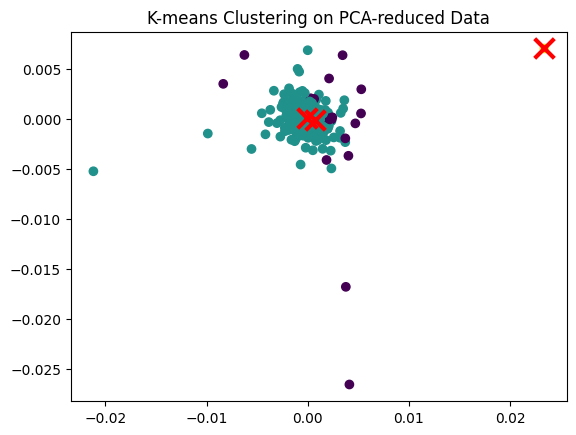

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans

pca = PCA(n_components=3)  # or however many components you want
reduced_data = pca.fit_transform(mni_X)

kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw")
kmeans.fit(reduced_data)

# pca = PCA(n_components=8)  # or however many components you want
# reduced_data = pca.fit_transform(mni_X)
# kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10)
# kmeans.fit(reduced_data)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-means Clustering on PCA-reduced Data')
plt.show()